#### 1: Import the dataset

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np

In [2]:
#Import the advertising dataset
df_adv=pd.read_csv('../dataset/Advertising Budget and Sales.csv',index_col=0)


#### 2: Analyze the dataset

In [3]:
#View the initial few records of the dataset
df_adv.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#Check the total number of elements in the dataset
df_adv.size

800

In [5]:
df_adv.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

In [6]:
df_adv.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

#### 3: Find the features or media channels used by the firm

In [7]:
#Check the number of observations (rows) and attributes (columns) in the dataset
df_adv.shape

(200, 4)

In [8]:
#View the names of each of the attributes
df_adv.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

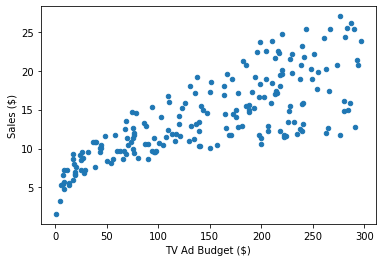

In [14]:
# market mix modelling -
# budget - maxmisation of sales



# the relationship b.w. dependent (sales ) and independent var is linear


df_adv.plot(kind='scatter',x='TV Ad Budget ($)',y='Sales ($)')

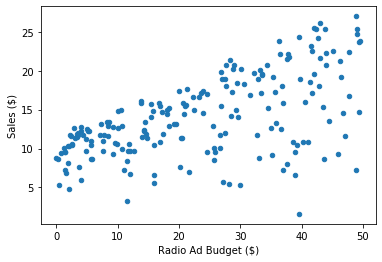

In [15]:
df_adv.plot(kind='scatter', x='Radio Ad Budget ($)',y='Sales ($)')

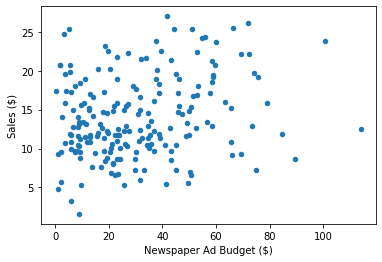

In [16]:
df_adv.plot(kind='scatter',x='Newspaper Ad Budget ($)',y='Sales ($)')

In [17]:
import seaborn as sns

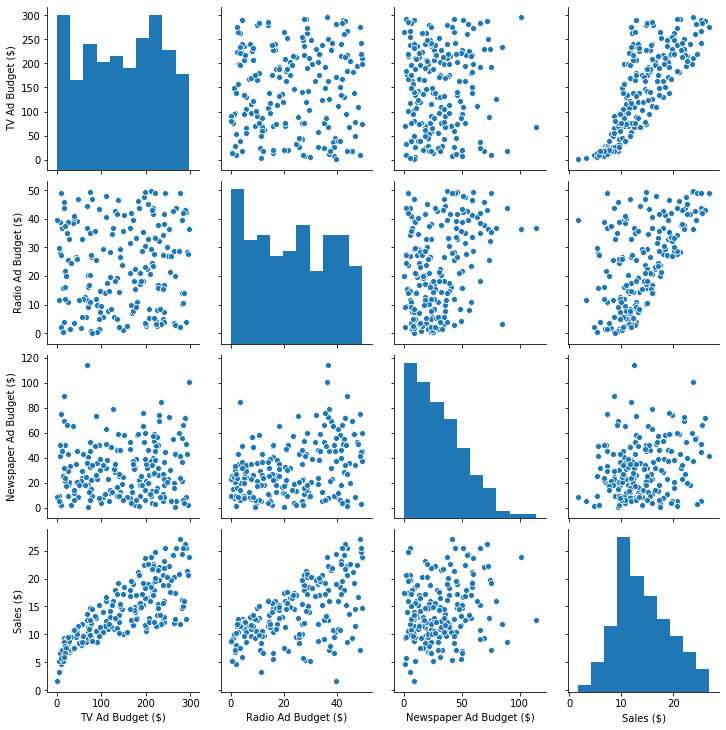

In [18]:
sns.pairplot(data=df_adv)

#### 4: Create objects to train and test the model; find the sales figures for each channel

In [25]:
#Create a feature object from the columns
X=df_adv.iloc[:,:3]
# or X=df_adv[[TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]

In [26]:
#View the feature object
X.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [30]:
type(X)

pandas.core.frame.DataFrame

In [36]:
#Create a target object (Hint: use the sales column as it is the response of the dataset)
Y=pd.DataFrame(df_adv.iloc[:,3])

In [37]:
#View the target object
Y.head()

,Sales ($)
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [38]:
type(Y)

pandas.core.frame.DataFrame

In [39]:
#Verify if all the observations have been captured in the feature object
X.shape

(200, 3)

In [40]:
#Verify if all the observations have been captured in the target object
Y.shape

(200, 1)

#### 5: Split the original dataset into training and testing datasets for the model

In [42]:
#Split the dataset (by default, 75% is the training data and 25% is the testing data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=1)

In [44]:
#Verify if the training and testing datasets are split correctly (Hint: use the shape() method)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150, 1)
(50, 3)
(50, 1)


#### 6: Create a model  to predict the sales outcome

In [45]:
#Create a linear regression model
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()
lrm.fit(x_train,y_train) #usually i'ld do for X,Y later

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Print the intercept and coefficients 
print(lrm.intercept_)
print(lrm.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [49]:
#Predict the outcome for the testing dataset
pred=lrm.predict(x_test)
pred[:10,:]

array([[21.70910292],
       [16.41055243],
       [ 7.60955058],
       [17.80769552],
       [18.6146359 ],
       [23.83573998],
       [16.32488681],
       [13.43225536],
       [ 9.17173403],
       [17.333853  ]])

#### 7: Calculate the Mean Square Error (MSE)

In [50]:
#Import required libraries for calculating MSE (mean square error)
from sklearn  import metrics

In [51]:
#Calculate the MSE
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

1.4046514230328953


###  formula based model

In [24]:

# formula based model -

# 'y=x1+x2+x3+x4...'


import statsmodels.formula.api as smf
# smf.ols(formula='y=x1+x2+...')

# in regression, to find the values of the parameters - b0---bn
# y=b0+b1x1+b2x2+....bnxn

In [25]:
# Step 1:
#where y is a series and x is a dataframe
from sklearn.model_selection import train_test_split

In [42]:

df_advn=df_adv.rename(columns={'TV Ad Budget ($)':'TV','Radio Ad Budget ($)':'Radio',
               'Newspaper Ad Budget ($)':'Newspaper','Sales ($)':'Sales'})

In [43]:
df_advn

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [45]:
# step 2:

#fit the model on the training data

sales_model=smf.ols(formula='Sales~TV+Radio+Newspaper',data=df_advn).fit()

In [46]:
# step3 

# summary of the model

sales_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.58e-96
Time:                        13:00:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# y=b0+b1*TV+b2*new+b3*radio

# degrees of freedom of the residuals - 200-1-no of variables in the model
# 200-4=196

#eqn of relation is: sales=2.93 + 0.04*TV -0.001*news + 0.1885*radio +err



In [49]:
# for anova-f stat

# h0: all coeff are =0
# ha: all coeff <> 0 simulatenously

# since p < alpha , so we reject h0 

# the model is significant




In [50]:
# t tests are conducted to check if the variable is significant

# h0: coeff=0
# ha: coeff <>0

# for newspaper , p > alpha , so we fail to reject h0, newspaper is insignificant
Sales_model=smf.ols(formula='Sales~TV+Radio',data=df_advn).fit()

In [51]:
Sales_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 30 May 2021   Prob (F-statistic):           4.83e-98
Time:                        13:31:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# for getting the predicted values

# model_name.predict(training data)
df_advn['pred_sales']=Sales_model.predict(df_advn)

In [57]:
df_advn

,TV,Radio,Newspaper,Sales,pred_sales
1,230.1,37.8,69.2,22.1,20.555465
2,44.5,39.3,45.1,10.4,12.345362
3,17.2,45.9,69.3,9.3,12.337018
4,151.5,41.3,58.5,18.5,17.617116
5,180.8,10.8,58.4,12.9,13.223908
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,5.364512
197,94.2,4.9,8.1,9.7,8.152375
198,177.0,9.3,6.4,12.8,12.768048
199,283.6,42.0,66.2,25.5,23.792923


In [58]:
df_advn['err']=df_advn['Sales']-df_advn['pred_sales']

In [59]:
df_advn

,TV,Radio,Newspaper,Sales,pred_sales,err
1,230.1,37.8,69.2,22.1,20.555465,1.544535
2,44.5,39.3,45.1,10.4,12.345362,-1.945362
3,17.2,45.9,69.3,9.3,12.337018,-3.037018
4,151.5,41.3,58.5,18.5,17.617116,0.882884
5,180.8,10.8,58.4,12.9,13.223908,-0.323908
...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,5.364512,2.235488
197,94.2,4.9,8.1,9.7,8.152375,1.547625
198,177.0,9.3,6.4,12.8,12.768048,0.031952
199,283.6,42.0,66.2,25.5,23.792923,1.707077


In [60]:
df_advn['err'].mean()

1.2820855488371308e-14

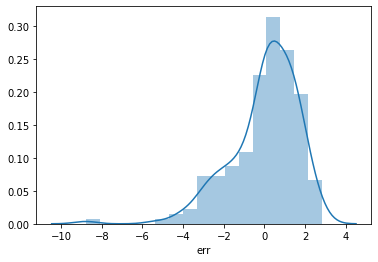

In [65]:
sns.distplot(df_advn['err'])

In [66]:
# check for constant variance for the errors vs the predicted values


# the errors should be homoscedastic () constant variance)


# we create a scatterplot between the pred sales and the errors

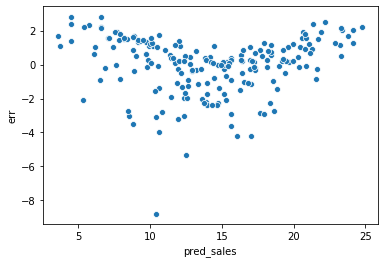

In [69]:
sns.scatterplot(df_advn['pred_sales'],df_advn['err'])